# Are Rosetta's range rate residuals explained by tracking signal lag?

Range rate residual oscillations similar to those of NEAR's post-encounter Doppler were reported for Rosetta's 2005 Earth flyby, which also had an anomalous $\Delta v$ ([Refs](../README.md#references) [2]).

They are similarly reproduced below by simulation of light-time lags in the tracking signal. They incidentally vanish if the initial state for the orbital elements is taken 3 or more days before perigee, as the initial lag is then too small to inflict a significant change at and through the perigee.

In [1]:
from astropy import units as u
from astropy import constants as const
from astropy.time import Time

from poliastro.util import norm
from poliastro.frames import Planes
from poliastro.ephem import Ephem
from poliastro.bodies import Earth

from poliastro.twobody.orbit import Orbit
from poliastro.twobody.sampling import EpochsArray

from astropy.coordinates import solar_system_ephemeris

import numpy as np
import sys
sys.path.append('../')

from sim.stations import dss25, esNewNorcia
from sim.tracking import Tracking
from sim.util import describe_orbit, describe_state, describe_trajectory, compare_orbits

solar_system_ephemeris.set("de440")
rosetta_start = Tracking.ROSETTA05_PERIGEE.value - 2.5*u.day
rosetta_end = Tracking.ROSETTA05_PERIGEE.value + 2*u.day

In [2]:
sampling_interval = 1800
sample_offsets = np.arange(0, (rosetta_end-rosetta_start)/(1*u.s), sampling_interval)
flyby_epochs = rosetta_start + (sample_offsets << u.s)
print("Start and end epochs:", flyby_epochs[0], flyby_epochs[-1], "[", flyby_epochs.size, "]")

Start and end epochs: 2005-03-02 10:09:14.000 2005-03-06 21:39:14.000 [ 216 ]


In [3]:
rosetta_reference_ephem = Ephem.from_horizons("Rosetta", rosetta_start, attractor=Earth, plane=Planes.EARTH_EQUATOR)
rosetta_reference_start_rv = rosetta_reference_ephem.rv(rosetta_start)
describe_state(rosetta_reference_start_rv, esNewNorcia, rosetta_start)


:AT: 2005-03-02 10:09:14.000
Geocentric distance: 915031.7192862619 km speed: 3.9778613815299204 km / s
From New Norcia : range  915918.5432640166 km , range rate  -4.3715887597001775 km / s


In [4]:
rosetta_reference_orbit = Orbit.from_vectors(Earth, rosetta_reference_start_rv[0], rosetta_reference_start_rv[1], rosetta_start)
describe_orbit(rosetta_reference_orbit)


::ORBIT::
Plane: Planes.EARTH_EQUATOR
Inclination: 144.82238427342534 deg
Eccentricity: 1.292627130280377
Semilatus rectum: 17884.71576022159 km
Semimajor axix: -26658.39671636818 km
Periapse radius: 7800.970128986643 km , altitude: 1422.8335289866436 km


In [5]:
rosetta_reference_ephem = rosetta_reference_orbit.to_ephem(EpochsArray(flyby_epochs))
describe_trajectory(rosetta_reference_ephem, esNewNorcia)


::TRAJECTORY::
Start and end ranges: 908044.5864620775 km 730873.1557984062 km
Start and end radial speeds: -4.371588759700371 km / s 4.011029505371629 km / s
Closest: 12264.917512605693 km speed 10.711376620361275 km / s  at  2005-03-04 22:09:14.000
Deflection: 101.31243228608156 deg


In [6]:
sim_meas_newnorcia = []

for e in flyby_epochs:
    rv = rosetta_reference_ephem.rv(e)
    ref_r, ref_rr, ref_ra = esNewNorcia.range_rate_accel(rv, e)
    sim_meas_newnorcia.append([ref_rr - ref_ra*ref_r/const.c])

print(sim_meas_newnorcia)

[[<Quantity -4.37158731 km / s>], [<Quantity -4.37611118 km / s>], [<Quantity -4.37378013 km / s>], [<Quantity -4.36463273 km / s>], [<Quantity -4.34882562 km / s>], [<Quantity -4.32663191 km / s>], [<Quantity -4.29843756 km / s>], [<Quantity -4.26473563 km / s>], [<Quantity -4.22611848 km / s>], [<Quantity -4.18326801 km / s>], [<Quantity -4.13694402 km / s>], [<Quantity -4.08797094 km / s>], [<Quantity -4.03722314 km / s>], [<Quantity -3.98560907 km / s>], [<Quantity -3.93405455 km / s>], [<Quantity -3.88348569 km / s>], [<Quantity -3.83481161 km / s>], [<Quantity -3.78890756 km / s>], [<Quantity -3.74659861 km / s>], [<Quantity -3.7086445 km / s>], [<Quantity -3.67572579 km / s>], [<Quantity -3.6484317 km / s>], [<Quantity -3.62724993 km / s>], [<Quantity -3.61255844 km / s>], [<Quantity -3.60461962 km / s>], [<Quantity -3.60357658 km / s>], [<Quantity -3.60945187 km / s>], [<Quantity -3.62214832 km / s>], [<Quantity -3.64145206 km / s>], [<Quantity -3.66703752 km / s>], [<Quantity 

In [7]:
rosetta_newnorcia_ephem = Ephem.from_horizons("Rosetta", rosetta_end, attractor=Earth, plane=Planes.EARTH_EQUATOR)
rosetta_newnorcia_start_rv = rosetta_newnorcia_ephem.rv(rosetta_end)
describe_state(rosetta_newnorcia_start_rv, esNewNorcia, rosetta_end)

rosetta_newnorcia_orbit = Orbit.from_vectors(Earth, rosetta_newnorcia_start_rv[0], rosetta_newnorcia_start_rv[1], rosetta_end)
describe_orbit(rosetta_newnorcia_orbit)


:AT: 2005-03-06 22:09:14.000
Geocentric distance: 741806.564067779 km speed: 3.9906083712949365 km / s
From New Norcia : range  735473.4650517753 km , range rate  4.025773810376044 km / s

::ORBIT::
Plane: Planes.EARTH_EQUATOR
Inclination: 144.89523778986052 deg
Eccentricity: 1.301158125781254
Semilatus rectum: 18601.337528014556 km
Semimajor axix: -26841.273973042345 km
Periapse radius: 8083.467763302583 km , altitude: 1705.3311633025833 km


In [8]:
from sim.fitorbit import OrbitFitter
fitter = OrbitFitter(rosetta_reference_orbit, [esNewNorcia], var=0.001, debug=True, max_iter=20)

Range constraints:
a: -26631738.319651812 -26685055.113084543
ecc: 1.2913345031500965 1.2939197574106571
inc: 2.5250998087235685 2.530155063595888
max iter: 20


In [9]:
from datetime import datetime 
start_time = datetime.now()
#print(start_time)

In [10]:
fitter.fit_doppler_data(flyby_epochs, sim_meas_newnorcia)
time_elapsed = datetime.now() - start_time
print(fitter.report())
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

-1. 0.214581 {'a': -26658396.71636818, 'ecc': 1.292627130280377, 'inc': 2.527627436159728, 'nu': -2.4318008549508234, 'raan': 2.9690208005401773, 'argp': 2.5154974607386746}
0. 0.214581 {'a': -26658396.71636818, 'ecc': 1.292627130280377, 'inc': 2.527627436159728, 'nu': -2.4318008549508234, 'raan': 2.9690208005401773, 'argp': 2.5154974607386746}
1. 0.214581 {'a': -26658396.71636818, 'ecc': 1.292627130280377, 'inc': 2.527627436159728, 'nu': -2.4318008549508234, 'raan': 2.9690208005401773, 'argp': 2.5154974607386746}
2. 0.214581 {'a': -26658396.71636818, 'ecc': 1.292627130280377, 'inc': 2.527627436159728, 'nu': -2.4318008549508234, 'raan': 2.9690208005401773, 'argp': 2.5154974607386746}
3. 0.214581 {'a': -26658396.71636818, 'ecc': 1.292627130280377, 'inc': 2.527627436159728, 'nu': -2.4318008549508234, 'raan': 2.9690208005401773, 'argp': 2.5154974607386746}
4. 0.214581 {'a': -26658396.71636818, 'ecc': 1.292627130280377, 'inc': 2.5276274361973927, 'nu': -2.4318008549508234, 'raan': 2.969020

In [11]:
describe_orbit(fitter.orbit)
describe_trajectory(fitter.ephem, esNewNorcia)


::ORBIT::
Plane: Planes.EARTH_EQUATOR
Inclination: 144.82367733197918 deg
Eccentricity: 1.292627130280377
Semilatus rectum: 17884715.76022159 m
Semimajor axix: -26658396.71636818 m
Periapse radius: 7800970.128986643 m , altitude: 1422833.528986643 m

::TRAJECTORY::
Start and end ranges: 908044.2670605821 km 730873.3779142571 km
Start and end radial speeds: -4.3715895571077485 km / s 4.011028695786858 km / s
Closest: 12264.721903662281 km speed 10.711318277903628 km / s  at  2005-03-04 22:09:14.000
Deflection: 101.31243229416361 deg


In [12]:
print(fitter.result.residual)

[-2.24905170e-03 -1.77063078e-03 -1.28636110e-03 -8.04740299e-04
 -3.34307755e-04  1.16503015e-04  5.39515685e-04  9.26963418e-04
  1.27163877e-03  1.56703766e-03  1.80749361e-03  1.98829840e-03
  2.10580531e-03  2.15751170e-03  2.14211782e-03  2.05955964e-03
  1.91101427e-03  1.69887753e-03  1.42671393e-03  1.09918069e-03
  7.21928095e-04  3.01479192e-04 -1.54907286e-04 -6.39386693e-04
 -1.14368654e-03 -1.65926852e-03 -2.17749026e-03 -2.68976311e-03
 -3.18770250e-03 -3.66326826e-03 -4.10889269e-03 -4.51759496e-03
 -4.88308087e-03 -5.19982764e-03 -5.46315362e-03 -5.66927367e-03
 -5.81534039e-03 -5.89947239e-03 -5.92077023e-03 -5.87932085e-03
 -5.77619129e-03 -5.61341225e-03 -5.39395176e-03 -5.12167926e-03
 -4.80132002e-03 -4.43839966e-03 -4.03917833e-03 -3.61057430e-03
 -3.16007622e-03 -2.69564384e-03 -2.22559695e-03 -1.75849252e-03
 -1.30299080e-03 -8.67711278e-04 -4.61080323e-04 -9.11730194e-05
  2.34447670e-04  5.08890369e-04  7.26088942e-04  8.80945136e-04
  9.69455149e-04  9.88814

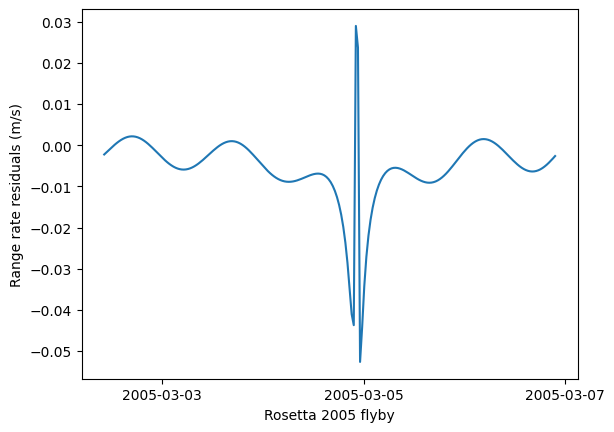

In [14]:
import matplotlib.pyplot as plt
from astropy import visualization
with visualization.time_support():
    plt.xlabel('Rosetta 2005 flyby')
    plt.ylabel('Range rate residuals (m/s)')
    plt.plot(flyby_epochs, fitter.result.residual)

In [15]:
from czml3.widget import CZMLWidget
from poliastro.czml.extract_czml import CZMLExtractor

czml = CZMLExtractor(flyby_epochs[0], flyby_epochs[-1], flyby_epochs.size)
dss25.add_to_czml(czml, "#333")
esNewNorcia.add_to_czml(czml, "#111")
czml.add_orbit(fitter.orbit)

CZMLWidget(czml.get_document())

CZMLWidget(document=Document(_values=[Preamble(id='document', version='1.0', name='document_packet', description=None, clock=IntervalValue(_start=<Time object: scale='utc' format='isot' value=2005-03-02T10:09:14.000>, _end=<Time object: scale='utc' format='isot' value=2005-03-06T21:39:14.000>, _value=Clock(currentTime=datetime.datetime(2005, 3, 2, 10, 9, 14, tzinfo=datetime.timezone.utc), multiplier=60, range=<ClockRanges.LOOP_STOP: 3>, step=<ClockSteps.SYSTEM_CLOCK_MULTIPLIER: 2>))), Packet(id='custom_properties', delete=None, name=None, parent=None, description=None, availability=None, properties={'custom_attractor': True, 'ellipsoid': [{'array': (6378136.6, 6378136.6, 6356751.9)}], 'map_url': ('https://upload.wikimedia.org/wikipedia/commons/c/c4/Earthmap1000x500compac.jpg',), 'scene3D': True}, position=None, orientation=None, viewFrom=None, billboard=None, box=None, corridor=None, cylinder=None, ellipse=None, ellipsoid=None, label=None, model=None, path=None, point=None, polygon=None, polyline=None, rectangle=None, tileset=None, wall=None), Packet(id='GS0', delete=None, name=None, parent=None, description='Goldstone-25', availability=TimeInterval(_start=<Time object: scale='utc' format='isot' value=2005-03-02T10:09:14.000>, _end=<Time object: scale='utc' format='isot' value=2005-03-06T21:39:14.000>), properties=None, position=Position(epoch=None, interpolationAlgorithm=None, interpolationDegree=None, delete=None, referenceFrame=None, cartesian=[-2354672.4950796734, -4646256.129838812, 3668480.5274884254], cartographicRadians=None, cartographicDegrees=None, cartesianVelocity=None, reference=None), orientation=None, viewFrom=None, billboard=Billboard(horizontalOrigin=None, verticalOrigin=None, image='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAACvSURBVDhPrZDRDcMgDAU9GqN0lIzijw6SUbJJygUeNQgSqepJTyHG91LVVpwDdfxM3T9TSl1EXZvDwii471fivK73cBFFQNTT/d2KoGpfGOpSIkhUpgUMxq9DFEsWv4IXhlyCnhBFnZcFEEuYqbiUlNwWgMTdrZ3JbQFoEVG53rd8ztG9aPJMnBUQf/VFraBJeWnLS0RfjbKyLJA8FkT5seDYS1Qwyv8t0B/5C2ZmH2/eTGNNBgMmAAAAAElFTkSuQmCC', show=True, scale=None, eyeOffset=None), box=None, corridor=None, cylinder=None, ellipse=None, ellipsoid=None, label=Label(horizontalOrigin=None, verticalOrigin=None, show=True, text=None, font='11pt Lucida Console', style=<LabelStyles.FILL: 1>, scale=None, showBackground=None, backgroundColor=None, fillColor=Color(epoch=None, interpolationAlgorithm=None, interpolationDegree=None, delete=None, rgba='#333', rgbaf=None), outlineColor=None, outlineWidth=1.0, pixelOffset=None), model=None, path=None, point=None, polygon=None, polyline=None, rectangle=None, tileset=None, wall=None), Packet(id='GS1', delete=None, name=None, parent=None, description='New Norcia', availability=TimeInterval(_start=<Time object: scale='utc' format='isot' value=2005-03-02T10:09:14.000>, _end=<Time object: scale='utc' format='isot' value=2005-03-06T21:39:14.000>), properties=None, position=Position(epoch=None, interpolationAlgorithm=None, interpolationDegree=None, delete=None, referenceFrame=None, cartesian=[-2413971.281821305, 4907675.176738348, -3270475.1545193326], cartographicRadians=None, cartographicDegrees=None, cartesianVelocity=None, reference=None), orientation=None, viewFrom=None, billboard=Billboard(horizontalOrigin=None, verticalOrigin=None, image='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAACvSURBVDhPrZDRDcMgDAU9GqN0lIzijw6SUbJJygUeNQgSqepJTyHG91LVVpwDdfxM3T9TSl1EXZvDwii471fivK73cBFFQNTT/d2KoGpfGOpSIkhUpgUMxq9DFEsWv4IXhlyCnhBFnZcFEEuYqbiUlNwWgMTdrZ3JbQFoEVG53rd8ztG9aPJMnBUQf/VFraBJeWnLS0RfjbKyLJA8FkT5seDYS1Qwyv8t0B/5C2ZmH2/eTGNNBgMmAAAAAElFTkSuQmCC', show=True, scale=None, eyeOffset=None), box=None, corridor=None, cylinder=None, ellipse=None, ellipsoid=None, label=Label(horizontalOrigin=None, verticalOrigin=None, show=True, text=None, font='11pt Lucida Console',

See [screenshot](rosetta_sim_approach_rangerate.png)